In [13]:
import pandas as pd
import numpy as np
flights= pd.read_csv('../datasets/airline_passenger_satisfaction.csv', )
flights.head()
nflights=flights.copy()

In [14]:
nflights.isna().sum()
#since there are no missing values in categorical column, we can simply apply fill na with mean to the dataframe

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             1
Departure Delay                            37
Arrival Delay                             487
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                            24
Gate Location                              24
On-board Service                           24
Seat Comfort                               24
Leg Room Service                           41
Cleanliness                                29
Food and Drink                             29
In-flight Service                          12
In-flight Wifi Service                     12
In-flight Entertainment           

In [15]:
column_names=['Flight Distance','Departure Delay','Arrival Delay', 'Online Boarding', 'Gate Location', 'On-board Service',
              'Seat Comfort', 'Leg Room Service', 'Cleanliness','Food and Drink',  'In-flight Service','In-flight Wifi Service','Satisfaction Score']
for i in column_names:
  nflights[i] = nflights[i].fillna(nflights[i].mean())

In [16]:
 #Normalize the distance
 nflights['Flight Distance'] = (nflights['Flight Distance'] - nflights['Flight Distance'].min()) / (nflights['Flight Distance'].max() - nflights['Flight Distance'].min())

In [17]:
nflights

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction Score
0,1,Male,48,First-time,Business,Business,0.159532,2.0,5.0,3,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5,5,3.30
1,2,Female,35,Returning,Business,Business,0.159532,26.0,39.0,2,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5,5,8.75
2,3,Male,41,Returning,Business,Business,0.165994,0.0,0.0,4,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3,3,6.95
3,4,Male,50,Returning,Business,Business,0.378433,0.0,0.0,2,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5,5,6.12
4,5,Female,49,Returning,Business,Business,0.694467,0.0,1.0,3,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3,3,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,0.084006,2.0,3.0,4,...,5.0,1.0,4.0,4.0,4.0,5.0,4.0,4,4,1.33
129876,129877,Male,41,Returning,Personal,Economy Plus,0.055937,0.0,0.0,5,...,5.0,2.0,5.0,2.0,2.0,4.0,3.0,2,5,0.77
129877,129878,Male,42,Returning,Personal,Economy Plus,0.061793,6.0,14.0,5,...,3.0,3.0,4.0,3.0,3.0,4.0,2.0,3,5,0.39
129878,129879,Male,50,Returning,Personal,Economy Plus,0.061793,31.0,22.0,4,...,4.0,4.0,5.0,3.0,3.0,4.0,5.0,3,5,5.73


# Satisfaction scores across customer types

<Axes: xlabel='Customer Type', ylabel='Satisfaction Score'>

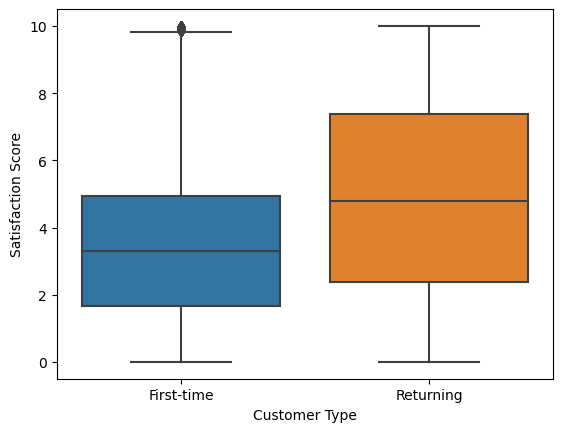

In [18]:
#Create separate plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=nflights, x='Customer Type', y='Satisfaction Score')

# Customer type distribution across the class

<Axes: xlabel='col_0', ylabel='row_0'>

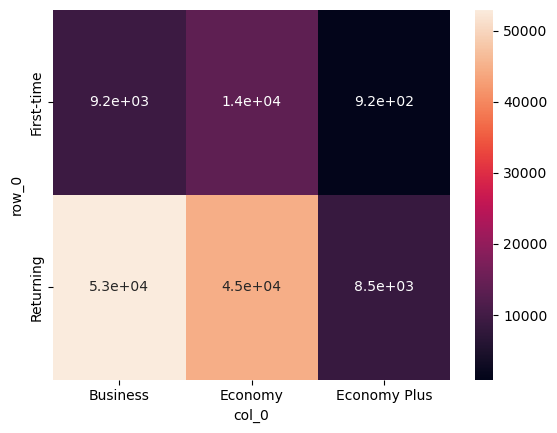

In [27]:
# A heatmap
foo = pd.Categorical(nflights['Customer Type'], categories=['First-time', 'Returning'])
bar = pd.Categorical(nflights['Class'], categories=['Business', 'Economy', 'Economy Plus'])
a= pd.crosstab(foo, bar, dropna=False)
sns.heatmap(a, annot=True)

# A chart showing the relationships between departure and arrival delays with satisfaction scores

In [29]:
from pandas.plotting import scatter_matrix
import plotly.express as px
df = nflights[['Departure Delay','Arrival Delay', 'Satisfaction Score']]
#normalized_df=(df-df.min())/(df.max()-df.min())
z_scores = (df - df.mean()) / df.std()

# Create the scatter matrix using plotly
fig = px.scatter_matrix(
    z_scores,
    dimensions=["Departure Delay", "Arrival Delay", "Satisfaction Score"],
    opacity=0.2
)

# Update the layout for all axes
for i in range(3):
    fig.update_layout({
        f"xaxis{i+1}": dict(range=[-5, 5]),
        f"yaxis{i+1}": dict(range=[-5, 5])
    })

# Show the plot
fig.show()

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [21]:
z_scores

,Departure Delay,Arrival Delay,Satisfaction Score
0,-0.333966,-0.262782,-0.477929
1,0.296506,0.622958,1.420885
2,-0.386505,-0.393038,0.793754
3,-0.386505,-0.393038,0.504577
4,-0.386505,-0.366987,0.521997
...,...,...,...
129875,-0.333966,-0.314885,-1.164289
129876,-0.386505,-0.393038,-1.359397
129877,-0.228887,-0.028322,-1.491791
129878,0.427855,0.180088,0.368698


# You were assigned to examine if the following experience-related features can be reduced to only three variables

In [30]:
ndf = nflights.iloc[:, 9:23]
ndf = ndf.astype('float')
#ndf=(ndf-ndf.min())/(ndf.max()-ndf.min())
#zscore normalization
from scipy import stats
Zndf = stats.zscore(ndf)
Zndf

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,-0.037727,0.173445,0.547894,-0.187024,0.018066,-0.297627,1.181508,-1.026506,1.304666,1.350015,1.154012,0.204063,1.230787,1.159206
1,-0.692719,-0.539957,-0.241883,1.293797,-0.764195,1.256402,0.423490,1.253066,1.304666,-0.154022,1.154012,-0.548237,1.230787,1.159206
2,0.617265,0.886847,0.547894,1.293797,0.800327,-0.297627,1.181508,-0.266648,1.304666,1.350015,-0.545773,0.956364,-0.268414,-0.535681
3,-0.692719,-0.539957,-0.241883,0.553386,-0.764195,1.256402,1.181508,1.253066,0.543342,0.597996,1.154012,-0.548237,1.230787,1.159206
4,-0.037727,0.173445,-0.241883,1.293797,0.018066,-0.297627,0.423490,0.493209,1.304666,0.597996,-0.545773,0.204063,-0.268414,-0.535681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.617265,0.886847,0.547894,0.553386,-0.764195,1.256402,-1.850565,0.493209,0.543342,0.597996,1.154012,0.956364,0.481186,0.311762
129876,1.272257,0.173445,1.337671,-0.187024,0.800327,1.256402,-1.092546,1.253066,-0.979307,-0.906040,0.304119,0.204063,-1.018015,1.159206
129877,1.272257,-0.539957,0.547894,-0.927434,-1.546456,-0.297627,-0.334528,0.493209,-0.217983,-0.154022,0.304119,-0.548237,-0.268414,1.159206
129878,0.617265,0.886847,-0.241883,0.553386,-1.546456,0.479387,0.423490,1.253066,-0.217983,-0.154022,0.304119,1.708665,-0.268414,1.159206


In [31]:
ndf.dtypes

Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service                    float64
In-flight Entertainment                   float64
Baggage Handling                          float64
dtype: object

Sorted Loadings for PC0:
                                             PC0
In-flight Entertainment                 0.428385
Cleanliness                             0.356500
Seat Comfort                            0.345176
Food and Drink                          0.307297
Online Boarding                         0.281073
On-board Service                        0.277610
In-flight Service                       0.266324
Baggage Handling                        0.263319
In-flight Wifi Service                  0.235567
Leg Room Service                        0.222967
Check-in Service                        0.181848
Ease of Online Booking                  0.163618
Departure and Arrival Time Convenience  0.100552
Gate Location                           0.065760 

Sorted Loadings for PC1:
                                             PC1
Ease of Online Booking                  0.534751
In-flight Wifi Service                  0.448074
Gate Location                           0.429879
Departure and Arr

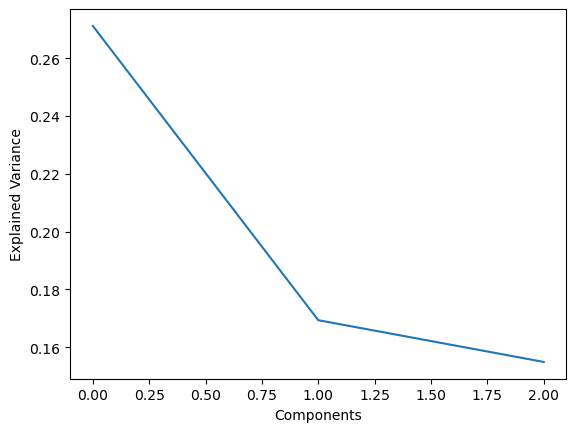

In [32]:
# Importing PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Let's say, components = 3
pca = PCA(n_components=3)
pca.fit(Zndf)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(3)],
index=Zndf.columns)

for pc in loadings.columns:
    print(f"Sorted Loadings for {pc}:")
    print(loadings[[pc]].sort_values(by=pc, ascending=False), "\n")

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [33]:
principalComponents = pca.fit_transform(Zndf)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])

dfnext = pd.concat([principalDf, nflights[['Satisfaction Score']]], axis = 1)
dfnext

,PC1,PC2,PC3,Satisfaction Score
0,2.237040,-0.846299,-0.669256,3.30
1,2.314240,-1.669048,1.129556,8.75
2,1.692701,1.155532,-2.178345,6.95
3,2.327461,-1.886049,0.994321,6.12
4,0.814517,0.100987,-1.447070,6.17
...,...,...,...,...
129875,1.430401,0.729759,1.363155,1.33
129876,0.021338,1.482110,2.708065,0.77
129877,-0.294222,-0.730052,1.301965,0.39
129878,1.324400,0.852962,1.011839,5.73


# If yes, please describe how these reduced features affect the overall satisfaction score through a linear model (10 points analysis +15 points interpretation = 25 points).**

In [34]:
#lasltly LR

import statsmodels.api as sm
dfnext_regression=dfnext.copy()
X = dfnext_regression[['PC1','PC2','PC3']]
X = sm.add_constant(X)
y = dfnext_regression['Satisfaction Score']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Satisfaction Score   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:41:26   Log-Likelihood:            -3.0612e+05
No. Observations:              129880   AIC:                         6.122e+05
Df Residuals:                  129876   BIC:                         6.123e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6718      0.007    658.991      0.0